# CLUSTERING

1. Lakukan langkah praktikum seperti yang ada di Modul 7

2. Tunjukkan hasil clustering dengan KMeans dan hasil evaluasi clustering

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
df_negara = pd.read_csv('negara.csv', index_col = 0)
df_negara.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


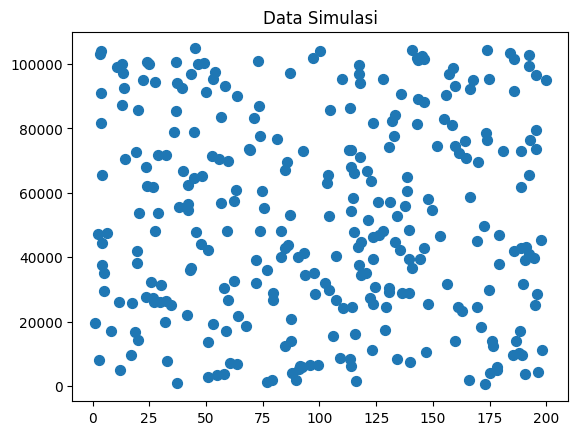

In [14]:
jumlah_sampel = 300
np.random.seed(0)
fitur1_simulasi = np.random.uniform(low=df_negara['exports'].min(),
high=df_negara['exports'].max(), size= jumlah_sampel)
fitur2_simulasi = np.random.uniform(low=df_negara['gdpp'].min(),
high=df_negara['gdpp'].max(), size= jumlah_sampel)
df_simulasi = pd.DataFrame({'Fitur1': fitur1_simulasi, 'Fitur2': fitur2_simulasi})
plt.scatter(df_simulasi['Fitur1'], df_simulasi['Fitur2'], s=50)
plt.title("Data Simulasi")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=2, random_state = 0)
clusters = kmeans.fit_predict(df_negara)
df_negara['Cluster'] = clusters
df_negara.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


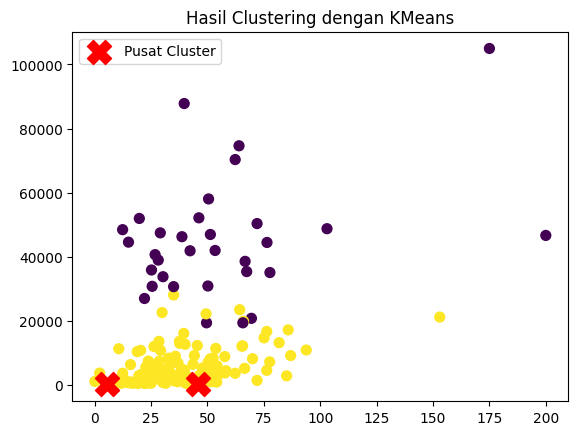

In [16]:
plt.scatter(df_negara['exports'], df_negara['gdpp'], c=clusters, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s=300, c='red', marker='X', label='Pusat Cluster')
plt.title("Hasil Clustering dengan KMeans")
plt.legend()
plt.show()

In [17]:
labels_pred = kmeans.fit_predict(df_negara.drop('Cluster', axis = 1))
ari = adjusted_rand_score(df_negara['Cluster'], labels_pred)
print(f"Adjusted Rand Index: {ari:.2f}")

Adjusted Rand Index: 1.00


3. Uji algoritma KMeans dengan jumlahcluster 2,3,4, dan 6. Tunjukkan masing-masing hasil
clustering dengan KMeans dan hasil evaluasi clustering

4. Uji dengan algoritma DBSCAN, tunjukkan hasil clusteringnya dan hasil evaluasi clusteringnya.

In [18]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_negara = pd.read_csv('negara.csv', index_col = 0)
from sklearn.metrics import adjusted_rand_score
df_negara.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [19]:
dbscan = DBSCAN(eps = 2, min_samples=300)
clusters = dbscan.fit_predict(df_negara)
df_negara['Cluster'] = clusters
df_negara.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


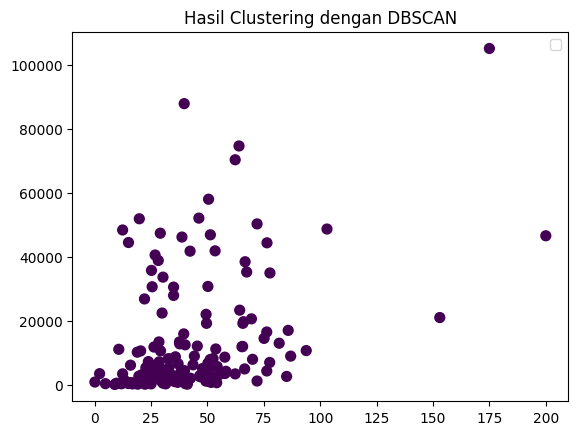

In [20]:
np.unique(clusters)
plt.scatter(df_negara['exports'], df_negara['gdpp'], c=clusters, s=50, cmap='viridis')
plt.title("Hasil Clustering dengan DBSCAN")
plt.legend()
plt.show()

In [21]:
labels_pred = dbscan.fit_predict(df_negara.drop('Cluster', axis = 1))
ari = adjusted_rand_score(df_negara['Cluster'], labels_pred)
print(f"Adjusted Rand Index: {ari:.2f}")

Adjusted Rand Index: 1.00


5. Uji dengan algoritma Agglomerative Clustering, tunjukkan hasil clusteringnya dan hasil
evaluasi clusteringnya.

In [22]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score
import pandas as pd
df_negara = pd.read_csv('negara.csv')
df_negara.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [23]:
label_encoder = LabelEncoder()
df_negara['country_encoded'] = label_encoder.fit_transform(df_negara['country'])
df_negara = df_negara.drop(columns=['country'])
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_cluster.fit_predict(df_negara)
df_negara['Cluster'] = clusters
df_negara.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_encoded,Cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4,1


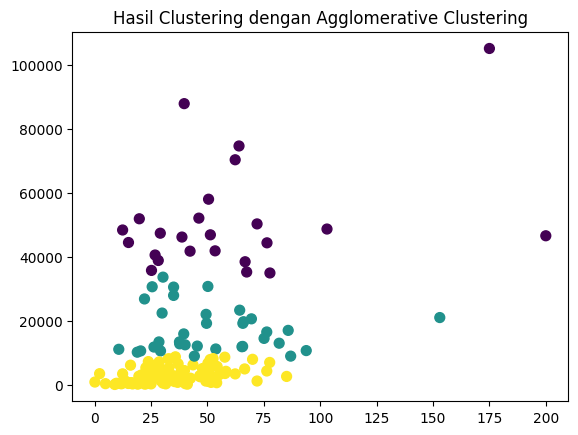

In [24]:
x = df_negara['exports']
y = df_negara['gdpp']
plt.scatter(x, y, c=clusters, s=50, cmap='viridis')
plt.title("Hasil Clustering dengan Agglomerative Clustering")
plt.show()

In [25]:
labels_pred = agg_cluster.fit_predict(df_negara.drop('Cluster', axis = 1))
ari = adjusted_rand_score(df_negara['Cluster'], labels_pred)
print(f"Adjusted Rand Index: {ari:.2f}")

Adjusted Rand Index: 1.00


6. Lakukan analisis perbandingan antara hasil clustering KMeans dengan jumlah cluster 2,3,4,5,
dan 6

```
Semakin banyak cluster yang ditambahkan, semakin halus resolusi yang dapat diidentifikasi, meningkatkan akurasi pemisahan kelompok, tetapi juga meningkatkan kompleksitas, risiko overfitting, dan memerlukan lebih banyak sumber daya komputasi. Oleh karena itu, pemilihan jumlah cluster harus seimbang antara tingkat resolusi yang diinginkan dan kemudahan interpretasi hasil, dengan mempertimbangkan tujuan analisis, sifat data, serta metode validasi cluster yang sesuai untuk mencapai hasil yang paling relevan dan informatif. Menggunakan
jumlah cluster yang tepat dalam algoritma KMeans sangatlah penting, karena jumlah cluster yang berbeda dapat memiliki dampak yang signifikan pada hasil analisis.
```

7. Lakukan analisis perbandingan antara hasil clustering KMeans dengan DBSCAN dan
Agglomerative Clustering

```
Pada algoritma K-Means terdapat pusat cluster sedangkan pada algoritma DBSCAN dan
Agglomerative Clustering tidak terdapat pusat cluster. Pada algoritma clustering K-Means
bergantung dari banyak cluster yang ditambahkan, semakin banyak cluster yang ditambahkan
semakin halus resolusi yang dapat diidentifikasi, meningkatkan akurasi pemisahan kelompok,
tetapi juga meningkatkan kompleksitas, risiko overfitting, dan memerlukan lebih banyak
sumber daya komputasi. Sedangkan algoritma DBSCAN dan Agglomerative Clustering
memberikan hasil yang jelas, tidak terdapat pusat cluster, dan sudah tidak bercampur dengan
note warna lain. Dalam algoritma K-Means, DBSCAN dan Agglomerative Clustering
menghasilkan nilai ARI (Adjusted Rand Index) sebesar 1.00.
```